In [1]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
import pypopulation

In [2]:
pd.read_csv('country_wise_latest.csv')

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263.0,1269.0,25198.0,9796.0,106.0,10.0,18.0,3.50,69.49,5.04,35526.0,737.0,2.07,Eastern Mediterranean
1,Albania,4880.0,144.0,2745.0,1991.0,117.0,6.0,63.0,2.95,56.25,5.25,4171.0,709.0,17.00,Europe
2,Algeria,27973.0,1163.0,18837.0,7973.0,616.0,8.0,749.0,4.16,67.34,6.17,23691.0,4282.0,18.07,Africa
3,Andorra,907.0,52.0,803.0,52.0,10.0,0.0,0.0,5.73,88.53,6.48,884.0,23.0,2.60,Europe
4,Angola,950.0,41.0,242.0,667.0,18.0,1.0,0.0,4.32,25.47,16.94,749.0,201.0,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Western Sahara,10.0,1.0,8.0,1.0,0.0,0.0,0.0,10.00,80.00,12.50,10.0,0.0,0.00,Africa
184,Yemen,1691.0,483.0,833.0,375.0,10.0,4.0,36.0,28.56,49.26,57.98,1619.0,72.0,4.45,Eastern Mediterranean
185,Zambia,4552.0,140.0,2815.0,1597.0,71.0,1.0,465.0,3.08,61.84,4.97,3326.0,1226.0,36.86,Africa
186,Zimbabwe,2704.0,36.0,542.0,2126.0,192.0,2.0,24.0,1.33,20.04,6.64,1713.0,991.0,57.85,Africa


In [3]:
# Load data
df = pd.read_csv('country_wise_latest.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    float64
 2   Deaths                  187 non-null    float64
 3   Recovered               187 non-null    float64
 4   Active                  187 non-null    float64
 5   New cases               187 non-null    float64
 6   New deaths              187 non-null    float64
 7   New recovered           187 non-null    float64
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    float64
 12  1 week change           187 non-null    float64
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [4]:
# replace 'inf' in Deaths / 100 Recovered column with median
inf_indices = df.index[df['Deaths / 100 Recovered'] == np.inf].tolist()
df.loc[inf_indices, 'Deaths / 100 Recovered'] = df['Deaths / 100 Recovered'].median()


# Data Transformation

In [5]:
# Adding Population Data to DataFrame
ctry = df['Country/Region']
input_countries = ['PS', 'Canada', 'France']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2

countryCodes = [countries.get(country, 'Unknown code') for country in ctry]

pop = []
for code in countryCodes:
    population = 0
    if code != 'Unknown code':
        population = pypopulation.get_population(code)
    pop.append(population)
df['Population'] = pop
# print(df['Population'][24:30])
#find the country with 0 population
zero_pop_countries = df[df['Population'] == 0]['Country/Region']
# set populations for known countries with meadian values
median_population = df['Population'].median()
for country in zero_pop_countries:
    if country == 'Holy See':
        df.loc[df['Country/Region'] == country, 'Population'] = 801
    elif country == 'MS Zaandam':
        df.loc[df['Country/Region'] == country, 'Population'] = 0
    else:
        df.loc[df['Country/Region'] == country, 'Population'] = median_population

# print(df['Population'][24:30])


In [6]:
# Calculate Case Fatality Rate (%)
df['Case Fatality Rate (%)'] = ((df['Deaths'] / df['Confirmed']) * 100).round(2)

# Calculate Recovery Rate (%)
df['Recovery Rate (%)'] = ((df['Recovered'] / df['Confirmed']) * 100).round(2)

df['Case Fatality Rate (%)'] = df.apply(
    lambda row: (row['Deaths'] / row['Confirmed']) * 100 if row['Confirmed'] else 0, axis=1
).round(2)

df['Case per hundredk'] = (df['Confirmed'] / df['Population']) * 100000


In [7]:
print(df['Case Fatality Rate (%)'].head(10))

0    3.50
1    2.95
2    4.16
3    5.73
4    4.32
5    3.49
6    1.83
7    1.90
8    1.09
9    3.47
Name: Case Fatality Rate (%), dtype: float64


# Outlier Detection and Removal

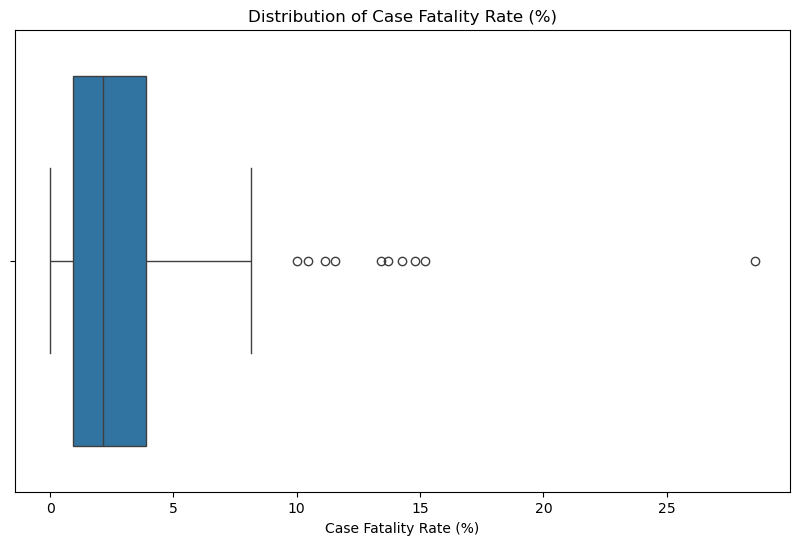

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Case Fatality Rate (%)')
plt.title('Distribution of Case Fatality Rate (%)')
plt.show()

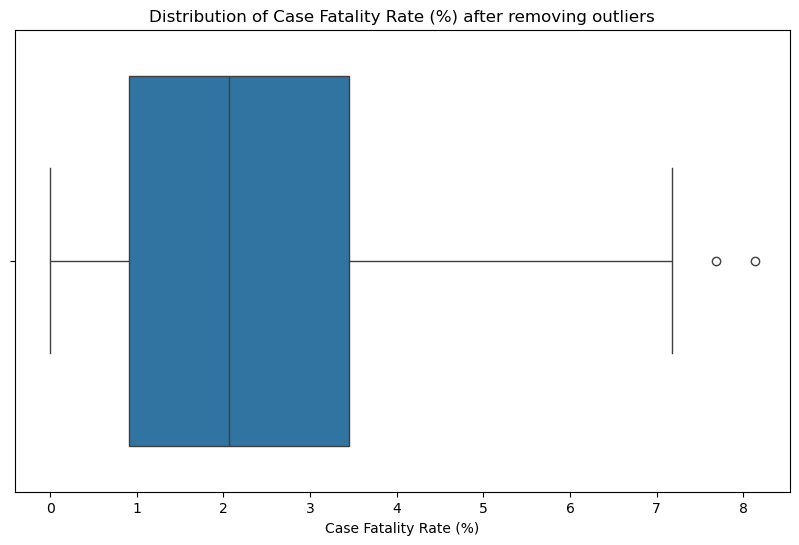

In [9]:
# Outlier removal using IQR method for 'Case Fatality Rate (%)
Q1 = df['Case Fatality Rate (%)'].quantile(0.25)
Q3 = df['Case Fatality Rate (%)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['Case Fatality Rate (%)'] >= lower_bound) & (df['Case Fatality Rate (%)'] <= upper_bound)]
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers, x='Case Fatality Rate (%)')
plt.title('Distribution of Case Fatality Rate (%) after removing outliers')
plt.show()


Top 10 countries by Case Fatality Rate (%):


/tmp/ipykernel_93027/753278044.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_cfr, x='Country/Region', y='Case Fatality Rate (%)', palette='Reds_r')


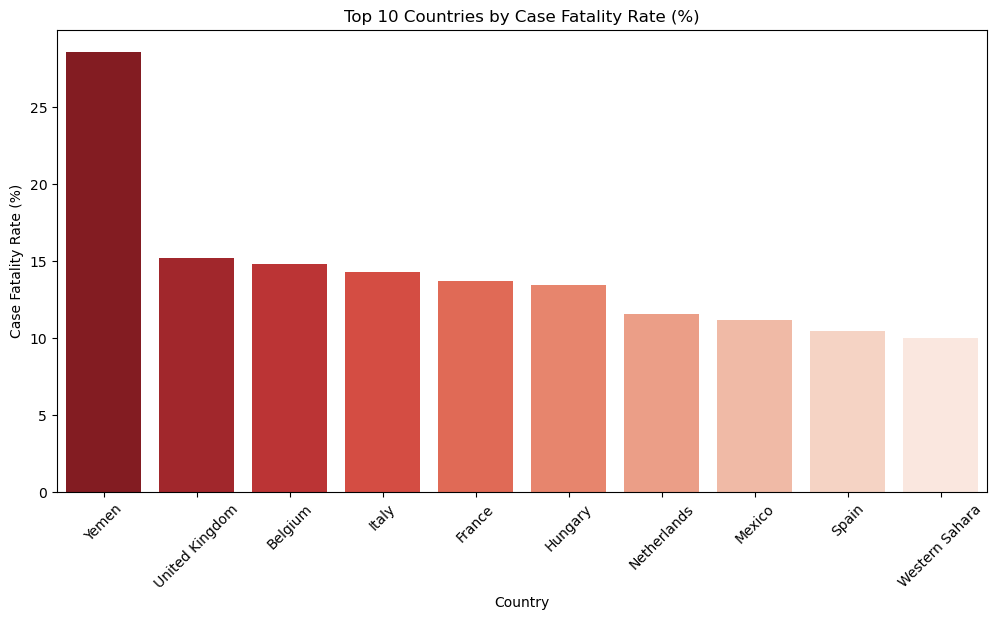

In [13]:
# top 10 countries by Case Fatality Rate (%)
top_10_cfr = df.sort_values(by='Case Fatality Rate (%)', ascending=False).head(10)
print("Top 10 countries by Case Fatality Rate (%):")

# plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_cfr, x='Country/Region', y='Case Fatality Rate (%)', palette='Reds_r')
plt.title('Top 10 Countries by Case Fatality Rate (%)')
plt.xlabel('Country')
plt.ylabel('Case Fatality Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Descriptive Statistics

In [ ]:
# Country with highest cases
top_cases_country = df_no_outliers.loc[df['Confirmed'].idxmax()]

# Country with highest deaths
top_deaths_country = df_no_outliers.loc[df['Deaths'].idxmax()]

# Country with highest recovery rate
top_recovery_country = df_no_outliers.loc[df['Recovery Rate (%)'].idxmax()]


In [ ]:
# Select major variables
columns_of_interest = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Case Fatality Rate (%)', 'Recovery Rate (%)']

# Generate stats
def get_stats(row):
    return row[columns_of_interest].agg(['mean', 'median', 'std'])

print("Country with Highest Confirmed Cases:", top_cases_country['Country/Region'])
print(get_stats(top_cases_country), '\n')

print("Country with Highest Deaths:", top_deaths_country['Country/Region'])
print(get_stats(top_deaths_country), '\n')

print("Country with Highest Recovery Rate:", top_recovery_country['Country/Region'])
print(get_stats(top_recovery_country), '\n')


Country with Highest Confirmed Cases: United States
mean      1.430092e+06
median    7.369075e+05
std       1.780301e+06
Name: 173, dtype: float64 

Country with Highest Deaths: United States
mean      1.430092e+06
median    7.369075e+05
std       1.780301e+06
Name: 173, dtype: float64 

Country with Highest Recovery Rate: Dominica
mean      22.666667
median     9.000000
std       38.898158
Name: 49, dtype: float64 



# Univariate Analysis

/tmp/ipykernel_57428/896590731.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x='Country/Region', y='Confirmed', palette='Blues_d')


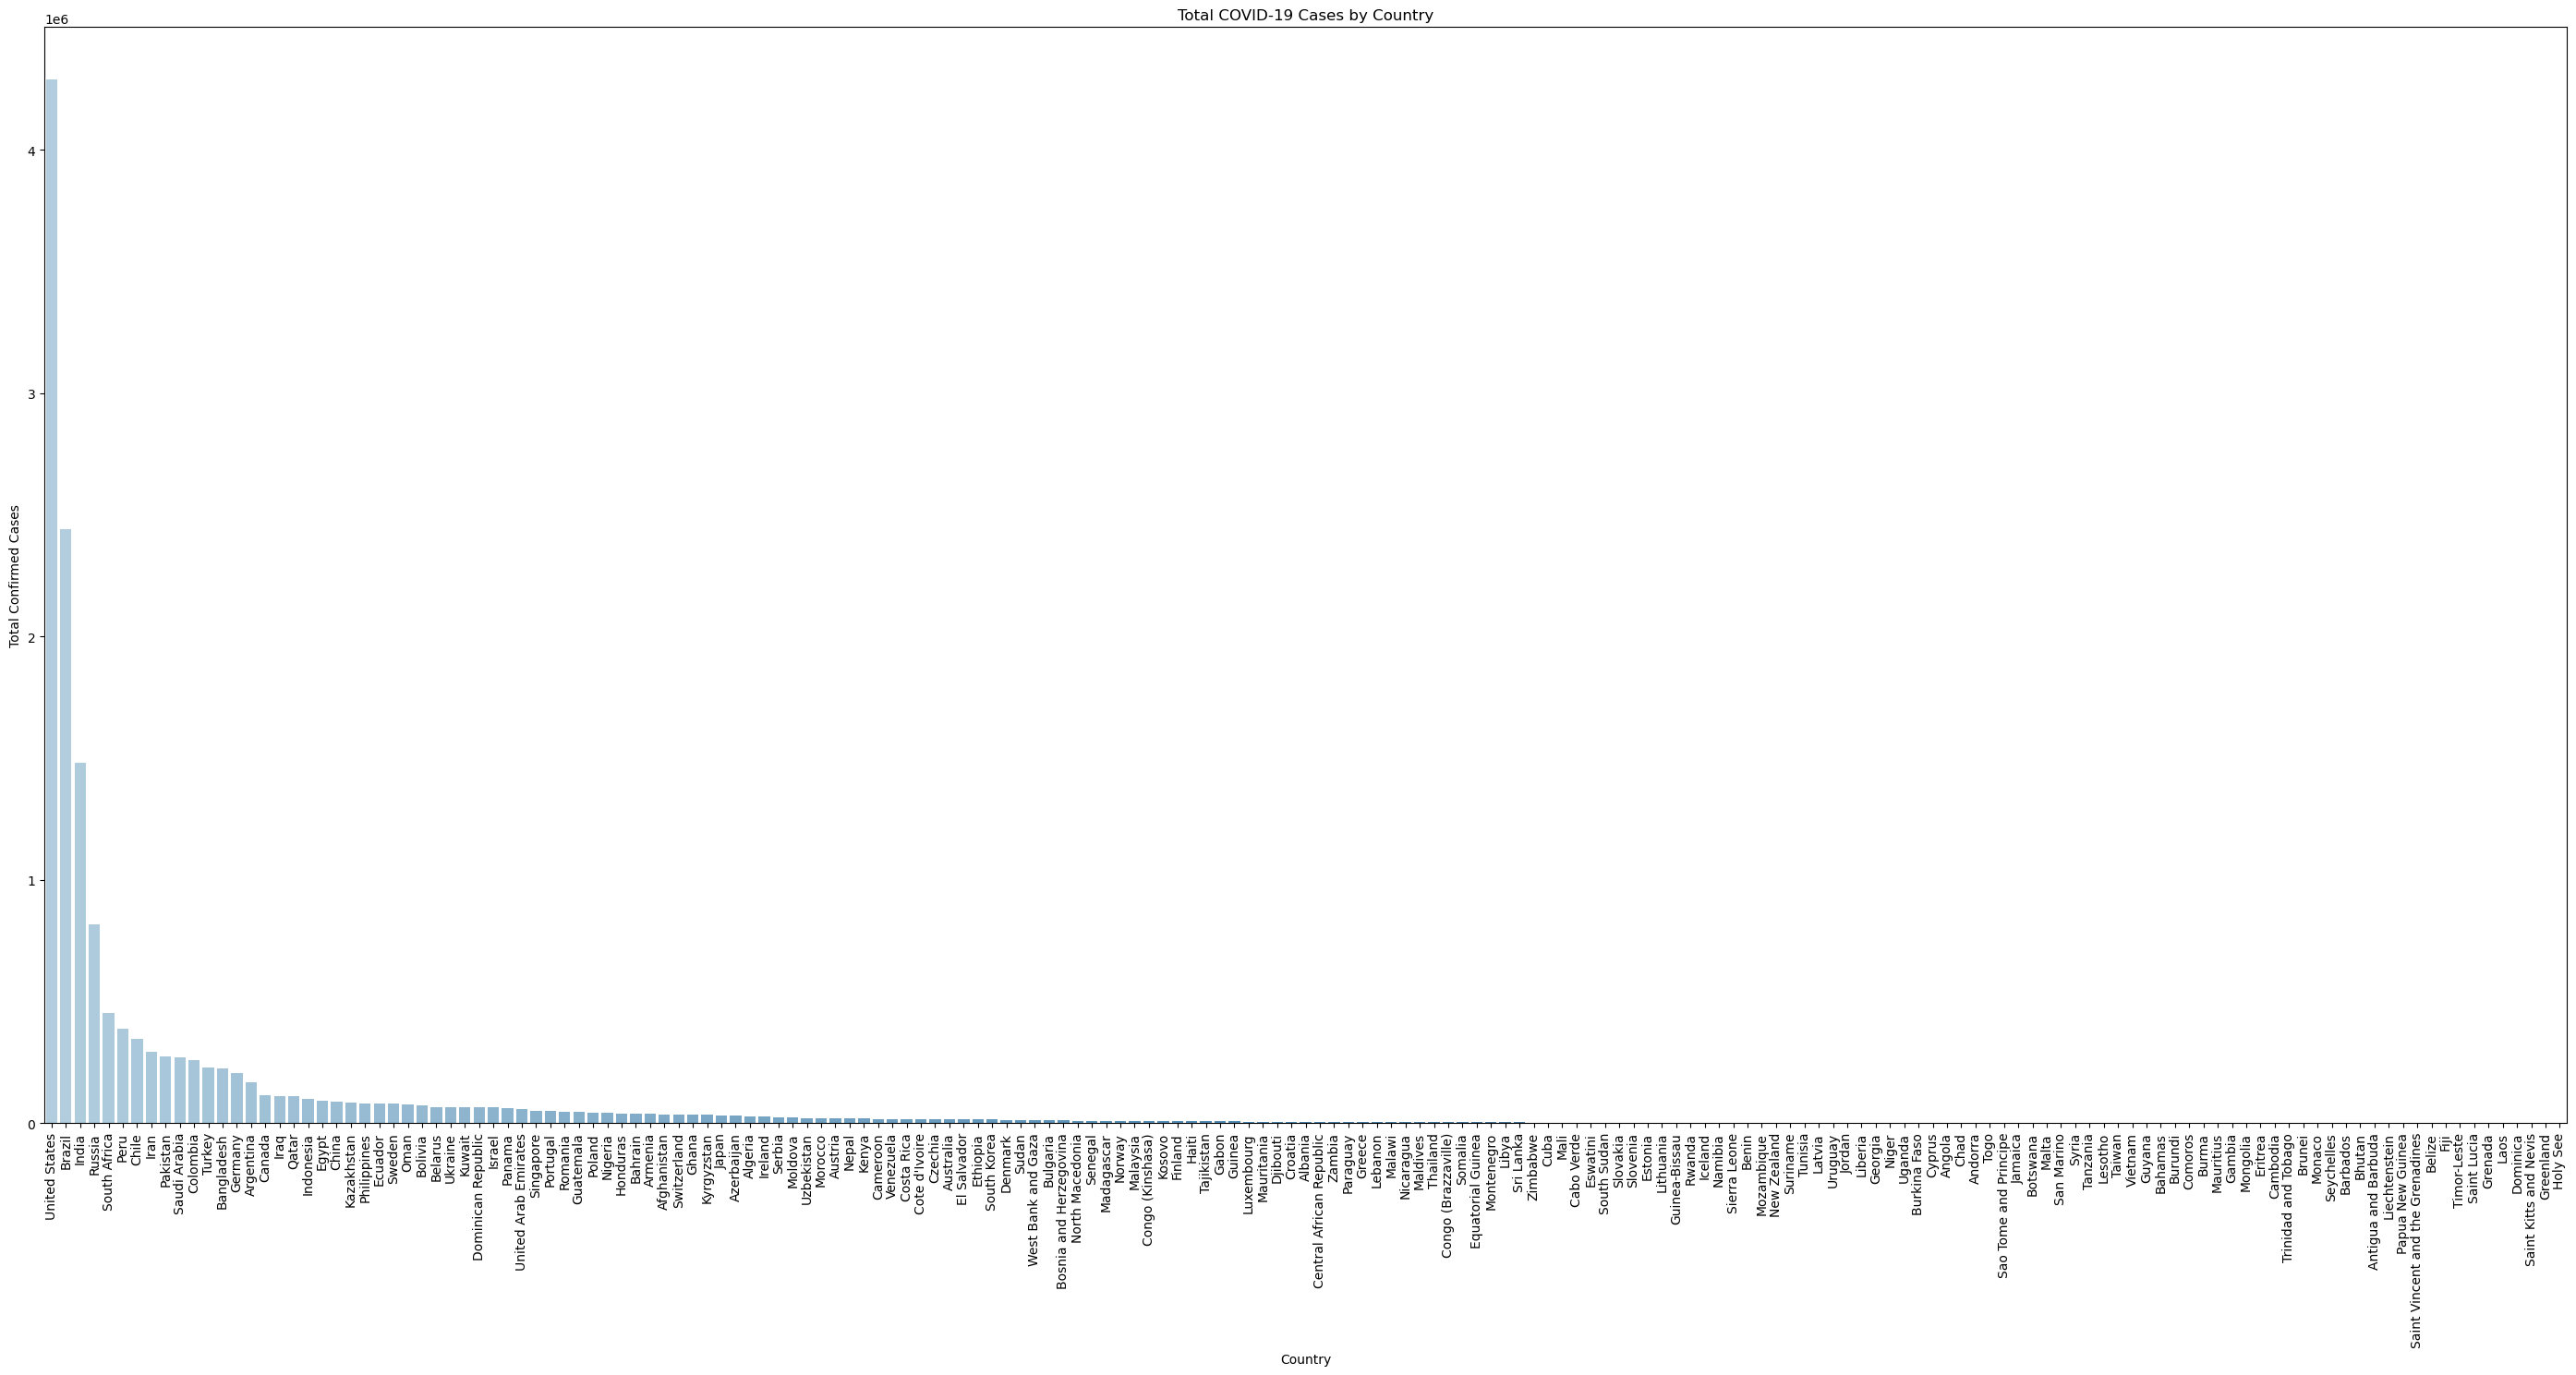

In [ ]:
df_sorted = df_no_outliers.sort_values(by='Confirmed', ascending=False)
plt.figure(figsize=(28, 15))
sns.barplot(data=df_sorted, x='Country/Region', y='Confirmed', palette='Blues_d')

plt.xlabel('Country')
plt.ylabel('Total Confirmed Cases')
plt.title('Total COVID-19 Cases by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/tmp/ipykernel_57428/2633227643.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x='Country/Region', y='Deaths', palette='Reds_d')


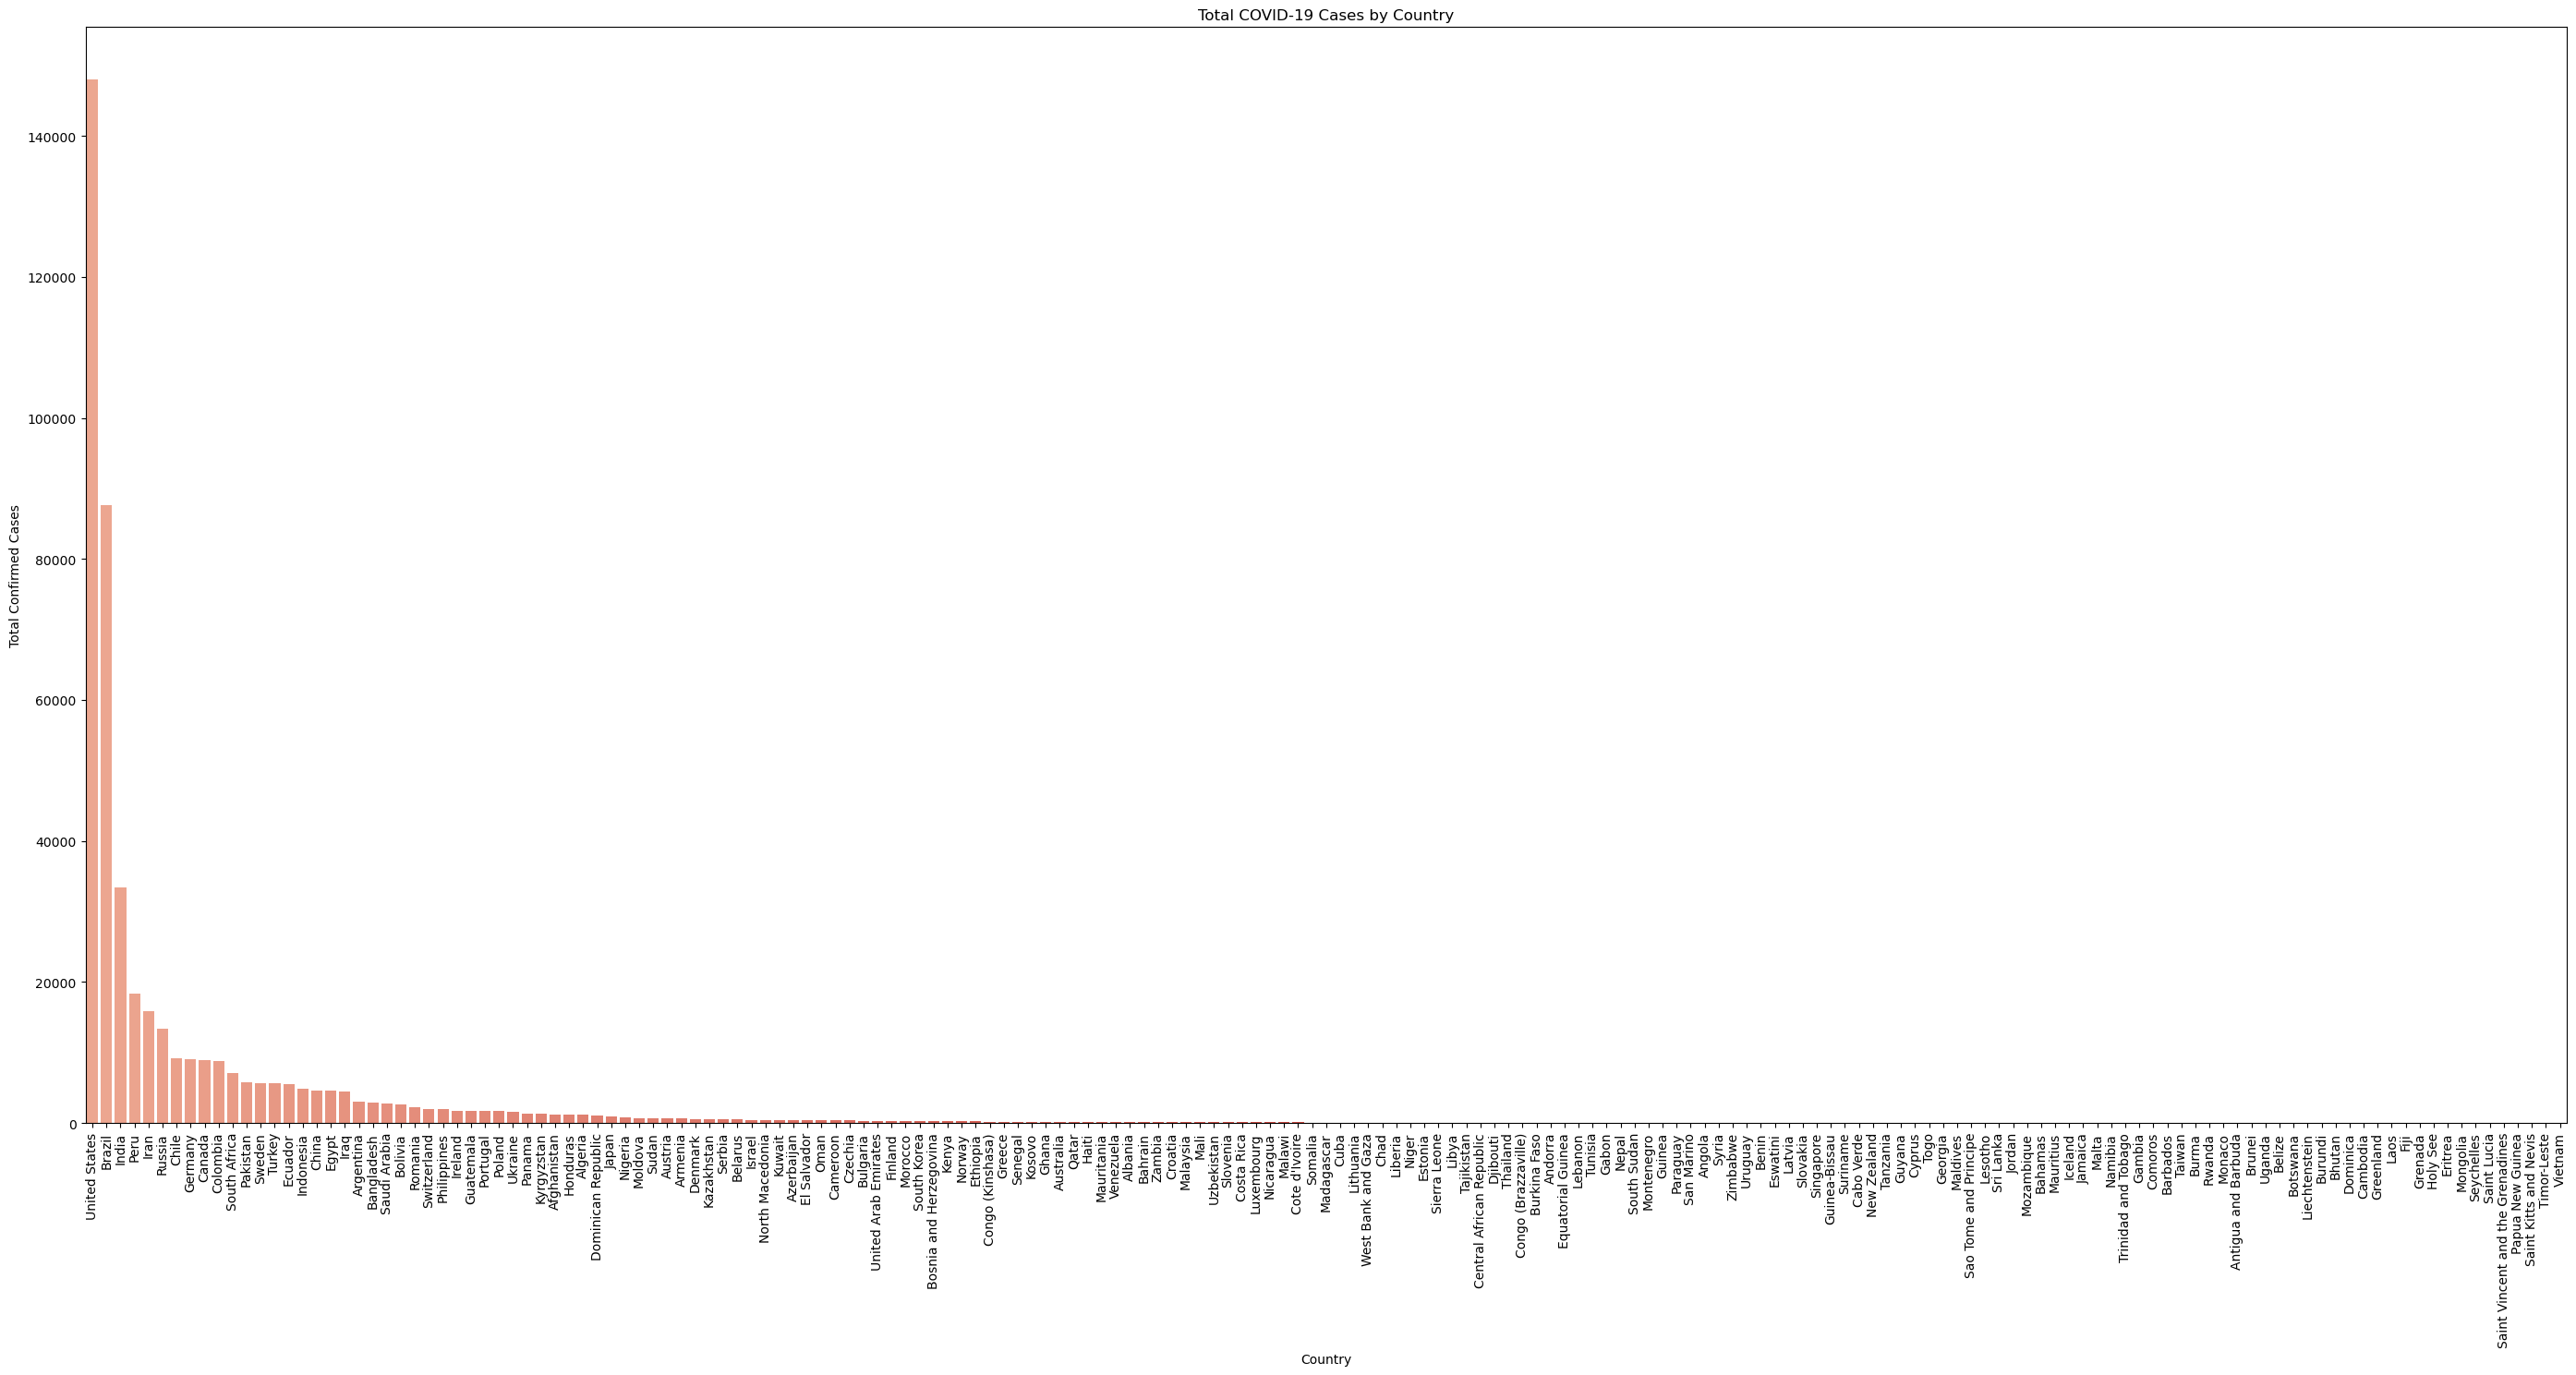

In [ ]:
df_sorted = df_no_outliers.sort_values(by='Deaths', ascending=False)
plt.figure(figsize=(28, 15))
sns.barplot(data=df_sorted, x='Country/Region', y='Deaths', palette='Reds_d')

plt.xlabel('Country')
plt.ylabel('Total Confirmed Cases')
plt.title('Total COVID-19 Cases by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

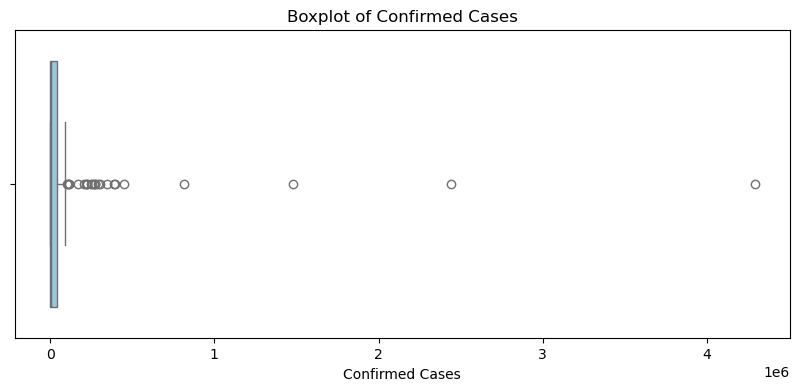

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Confirmed'], color='skyblue')
plt.title('Boxplot of Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.show()

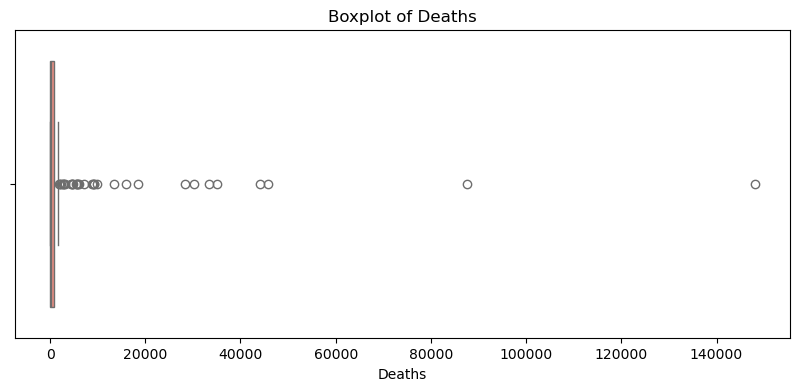

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Deaths'], color='salmon')
plt.title('Boxplot of Deaths')
plt.xlabel('Deaths')
plt.show()

# Bivariate Analysis

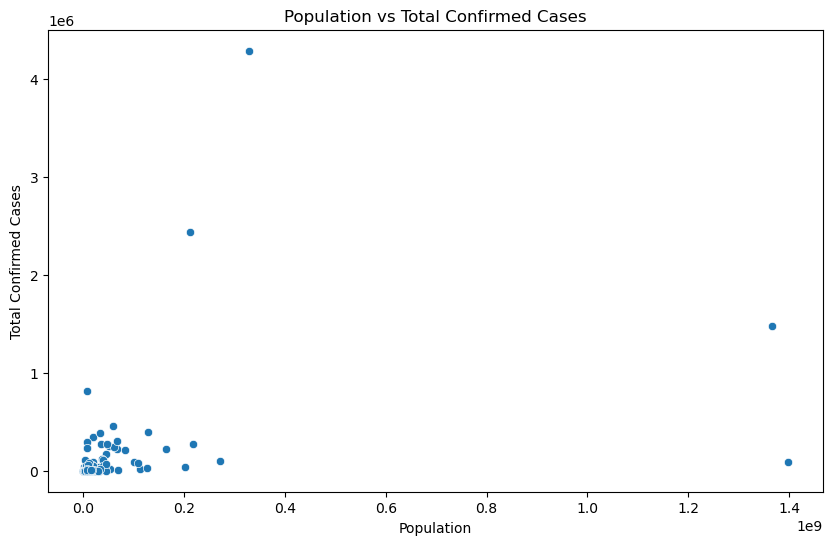

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Population', y='Confirmed')
plt.title('Population vs Total Confirmed Cases')
plt.xlabel('Population')
plt.ylabel('Total Confirmed Cases')
plt.show()

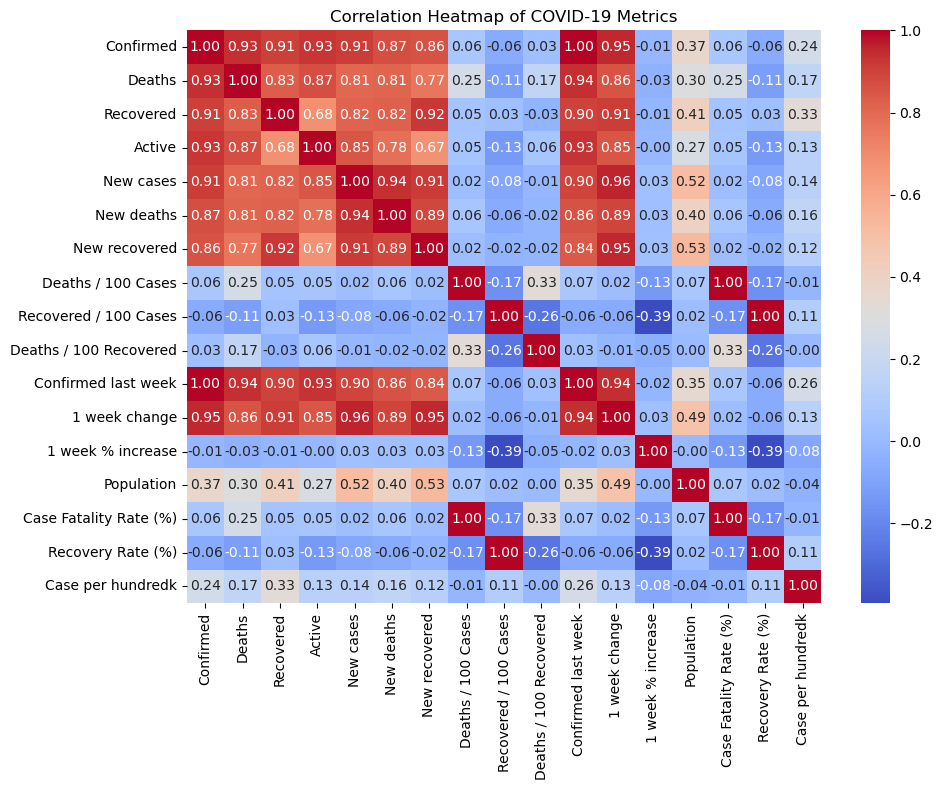

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
correlation = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap of COVID-19 Metrics')
plt.tight_layout()
plt.show()

# Comparative Visualizations

/tmp/ipykernel_57428/190056608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Country/Region', y='Confirmed', palette='Reds_r')


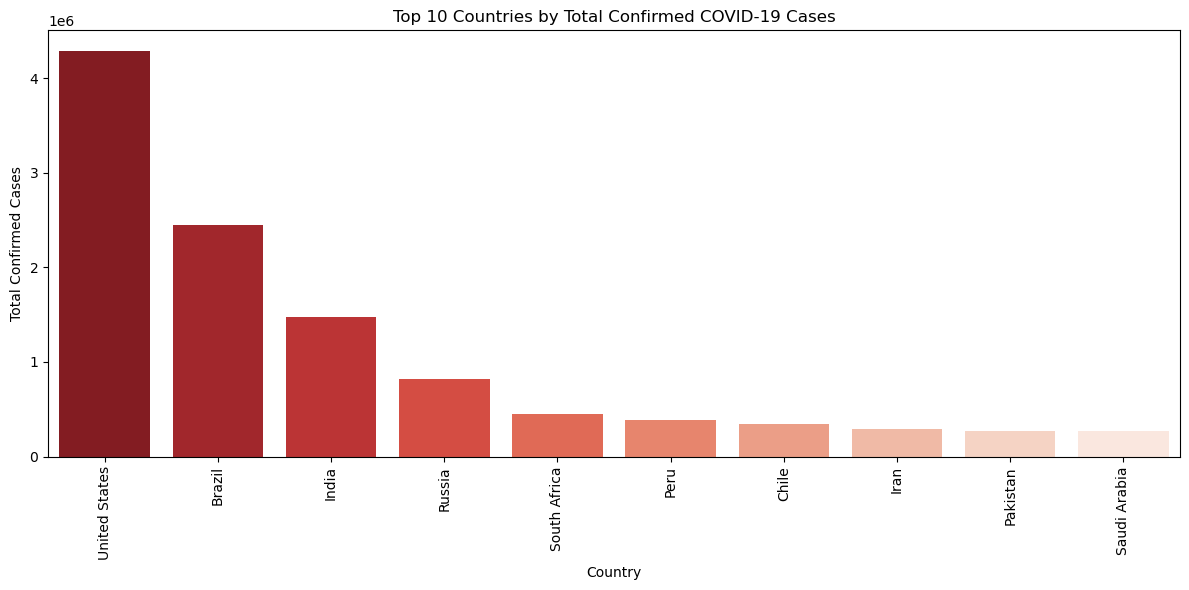

In [ ]:
top10 = df_no_outliers.sort_values(by='Confirmed', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='Country/Region', y='Confirmed', palette='Reds_r')

plt.title('Top 10 Countries by Total Confirmed COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

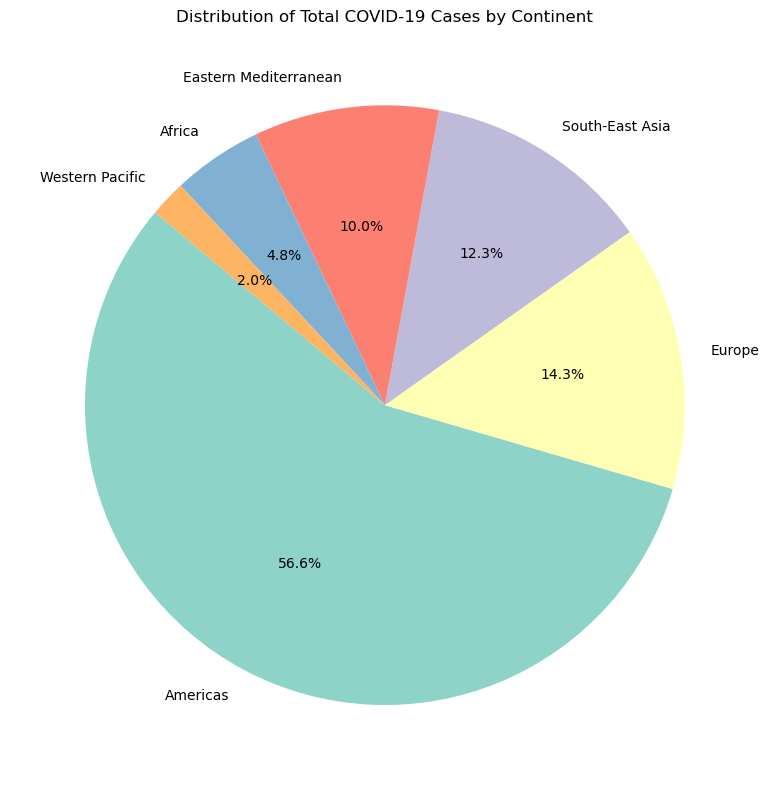

In [ ]:
# Group total cases by continent
continent_cases = df_no_outliers.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(continent_cases, labels=continent_cases.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))

plt.title('Distribution of Total COVID-19 Cases by Continent')
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('clean_country_wise_latest.csv', index=False)